In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IncomeGroup  Analysis

In [27]:
indicators = pd.read_csv("/Users/ruiqizhang/Downloads/world-development-indicators//Indicators.csv")
#indicators.IndicatorName.unique()
indicators.CountryName.unique()
list = ['Arab World', 'Caribbean small states', 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)', 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)', 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)', 'High income',
 'High income: nonOECD', 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification', 'Low & middle income',
 'Low income', 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)', 'Middle income',
 'North America' 'OECD members' ,'Other small states',
 'Pacific island small states', 'Small states', 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)' ,'Upper middle income' ,'World', 'North America', 'OECD members']

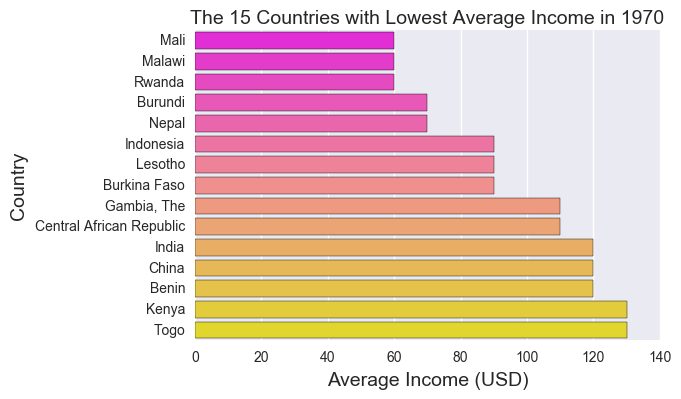

In [80]:
lowestIC_2014 = indicators.query("IndicatorCode == 'NY.GNP.PCAP.CD' & CountryName != list & Year == 2014").sort_values(by = 'Value', ascending = True)[:15]
lowestIC_1970 = indicators.query("IndicatorCode == 'NY.GNP.PCAP.CD' & CountryName != list & Year == 1970").sort_values(by = 'Value', ascending = True)[:15]
#NY.GNP.PCAP.CD means GDP per capita (current US$)
Lchart1970 = sns.barplot(x = "Value", y = "CountryName", palette = "spring", data = lowestIC_1970)
plt.xlabel('Average Income (USD)', fontsize = 14)
plt.ylabel('Country',  fontsize=14)
plt.title('The 15 Countries with Lowest Average Income in 1970', fontsize = 14)
#plt.show()
plt.savefig('A2_1.png')

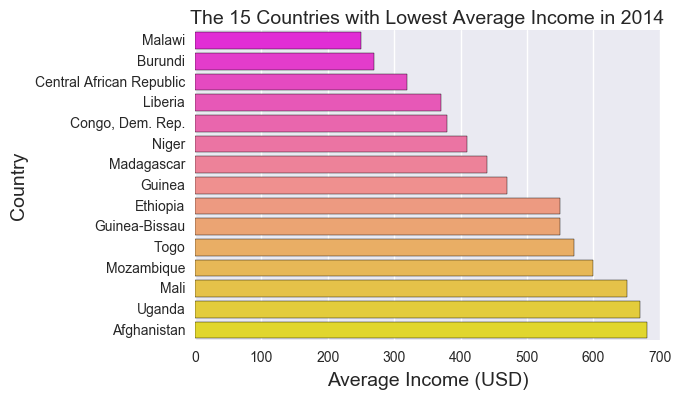

In [81]:
#fig2 = plt.subplots()
Lchart2014 = sns.barplot(x = "Value", y = "CountryName", palette = "spring", data = lowestIC_2014)
plt.xlabel('Average Income (USD)', fontsize = 14)
plt.ylabel('Country', fontsize = 14)
plt.title('The 15 Countries with Lowest Average Income in 2014', fontsize = 14)
#plt.show()
plt.savefig('A2_2.png')

In [40]:
for key,group in lowestIC_1970.groupby(['CountryName']):
    for key2, group2 in lowestIC_2014.groupby(['CountryName']):
        if key == key2:
            print (key)


Burundi
Central African Republic
Malawi
Mali
Togo


In [45]:
#for key,group in lowestIC_1970.groupby(['CountryName']):
   # for key2, group2 in lowestIC_2014.groupby(['CountryName']):
     #   if key != key2:
           #print (key)

In [37]:
China = indicators.loc[indicators['CountryName']==('China')]
China.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7144,China,CHN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,68.033200
7145,China,CHN,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,77.322072
7146,China,CHN,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.472535
7147,China,CHN,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,70.849537
7148,China,CHN,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,1960,23.383665


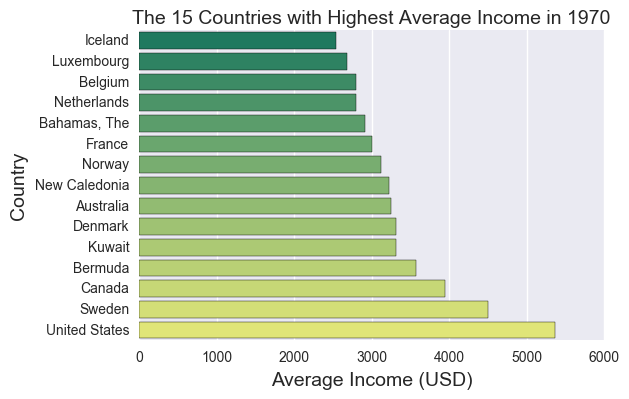

In [84]:
hightest_1970 = indicators.query("IndicatorCode == 'NY.GNP.PCAP.CD' & CountryName != list & Year == 1970").sort_values(by = 'Value')[-15:]
hightest_2014 = indicators.query("IndicatorCode == 'NY.GNP.PCAP.CD' & CountryName != list & Year == 2014").sort_values(by= 'Value')[-15:]

Hchart1970 = sns.barplot(x = "Value", y = "CountryName", palette = "summer", data = hightest_1970)
plt.xlabel('Average Income (USD)', fontsize = 14)
plt.ylabel('Country',  fontsize=14)
plt.title('The 15 Countries with Highest Average Income in 1970', fontsize = 14)
#plt.show()
plt.savefig('A2_3.png')

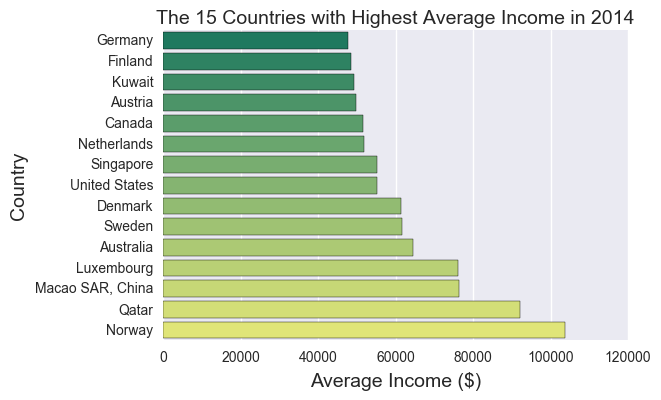

In [83]:
Hchart2014 = sns.barplot(x = "Value", y = "CountryName", palette = "summer", data = hightest_2014)
plt.xlabel('Average Income ($)', fontsize = 14)
plt.ylabel('Country',  fontsize=14)
plt.title('The 15 Countries with Highest Average Income in 2014', fontsize = 14)
#plt.show()
plt.savefig('A2_4.png')

In [74]:
for key,group in hightest_2014.groupby(['CountryName']):
    for key2, group2 in hightest_1970.groupby(['CountryName']):
        if key == key2:
            print (key)

Australia
Canada
Denmark
Kuwait
Luxembourg
Netherlands
Norway
Sweden
United States


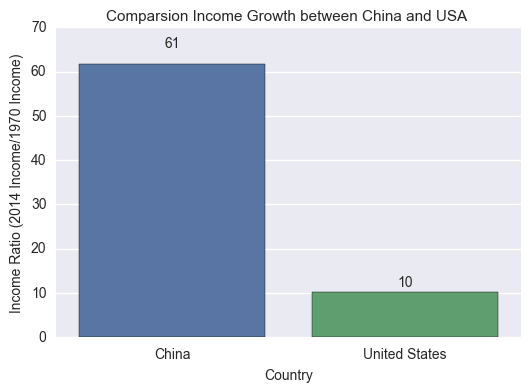

In [88]:
ic1970 = indicators.query("IndicatorCode == 'NY.GNP.PCAP.CD' & Year == 1970 & CountryName == [ 'China','United States']")
ic2014 =indicators.query("IndicatorCode == 'NY.GNP.PCAP.CD' & Year == 2014 & CountryName == [ 'China', 'United States']")

a = pd.Series(ic2014['Value'].reset_index(drop = True))
b = pd.Series(ic1970 ['Value'].reset_index(drop = True))
ratio = a/b

ic_ratio = sns.barplot(x = ['China', 'United States'], y = ratio, order = ['China',  'United States', ])
plt.title('Comparsion Income Growth between China and USA ', fontsize = 11)
plt.xlabel('Country', fontsize = 10)
plt.ylabel('Income Ratio (2014 Income/1970 Income)', fontsize = 10)

for p in ic_ratio.patches:
    height = p.get_height()
    ic_ratio.text(p.get_x() + p.get_width()/2., 1.05*height,
                '%d' % int(height), ha='center', va='bottom')
plt.savefig('A2_5.png')